In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

Let us first load our dataset into the program using pandas dataframe

In [2]:
dataframe = pd.read_csv('gold_loan_final_1.csv')

Now let us look at the dataframe we have

In [3]:
dataframe.head(3)

,Name,Nationality,Age,Identity_documents,Gold_Type,Gold_Weight,Gold_Purity,Gold_documents,Eligibility
0,Raj Shrivastav,Indian,23,Verified,Ornaments,10.3,23,Verified,Yes
1,Mahindra Singh,Indian,31,Verified,Ornaments,20.0,21,Verified,Yes
2,Amar Singh,Indian,56,Verified,Ornaments,11.0,21,Verified,Yes


First, let us name the columns

In [4]:
dataframe.columns = ['Name','Nationality','Age','Identity_documents','Gold_type','Gold_weight','Gold_purity','Gold_documents','Eligibility']
dataframe.head(3)

,Name,Nationality,Age,Identity_documents,Gold_type,Gold_weight,Gold_purity,Gold_documents,Eligibility
0,Raj Shrivastav,Indian,23,Verified,Ornaments,10.3,23,Verified,Yes
1,Mahindra Singh,Indian,31,Verified,Ornaments,20.0,21,Verified,Yes
2,Amar Singh,Indian,56,Verified,Ornaments,11.0,21,Verified,Yes


Since there are no null values present in our data let us further see basic stats of our dataset

In [5]:
dataframe = dataframe.dropna()

In [6]:
dataframe.isnull().sum()

Name                  0
Nationality           0
Age                   0
Identity_documents    0
Gold_type             0
Gold_weight           0
Gold_purity           0
Gold_documents        0
Eligibility           0
dtype: int64

In [7]:
dataframe.describe()

,Age,Gold_weight,Gold_purity
count,101.000000,101.000000,101.000000
mean,42.207921,235.479208,21.930693
std,18.969616,278.639318,2.045764
min,15.000000,5.000000,18.000000
25%,27.000000,40.000000,21.000000
50%,38.000000,100.000000,23.000000
75%,55.000000,400.000000,23.000000
max,87.000000,1000.000000,24.000000


Since we have many variations in age let us now categorize it in groups as

**Underage = range(0,21)**

**Youth = range(21,36)**

**Middle_Aged = range(36,70)**

**Senior = >= 70**

In [8]:
age_np = dataframe['Age']
age_group = []
for i in age_np:
  if i < 21:
    age_group.append('Underage')
  elif i in range(21,36):
    age_group.append('Youth')
  elif i in range(36,70):
    age_group.append('Middle_aged')
  else:
    age_group.append('Senior')
age_group

['Youth',
 'Youth',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Senior',
 'Middle_aged',
 'Youth',
 'Senior',
 'Senior',
 'Middle_aged',
 'Underage',
 'Underage',
 'Youth',
 'Youth',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Senior',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Senior',
 'Underage',
 'Youth',
 'Senior',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Senior',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Underage',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Youth',
 'Middle_aged',
 'Senior',
 'Senior',
 'Underage',
 'Youth',
 'Youth',
 'Middle_aged',
 'Underage',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Senior',
 'Senior',
 'Middle_aged',
 'Youth',
 'Senior',
 'Youth',
 'Youth',
 'Youth',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Middle_aged',
 'Middle_aged',
 'Youth',
 'Middle_aged',
 'Youth'

In [9]:
dataframe['age_group'] = age_group
dataframe.head(3)

,Name,Nationality,Age,Identity_documents,Gold_type,Gold_weight,Gold_purity,Gold_documents,Eligibility,age_group
0,Raj Shrivastav,Indian,23,Verified,Ornaments,10.3,23,Verified,Yes,Youth
1,Mahindra Singh,Indian,31,Verified,Ornaments,20.0,21,Verified,Yes,Youth
2,Amar Singh,Indian,56,Verified,Ornaments,11.0,21,Verified,Yes,Middle_aged


In [10]:
pd.crosstab(dataframe['age_group'], dataframe['Eligibility'], margins=True)

Eligibility,No,Yes,All
age_group,,,
Middle_aged,22,19,41
Senior,14,0,14
Underage,8,0,8
Youth,16,22,38
All,60,41,101


Now let us see the how is the distribution of data for Gold_weight and gold_purity.

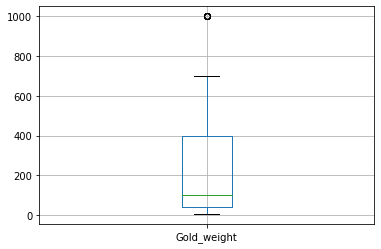

In [11]:
dataframe.boxplot(column='Gold_weight')

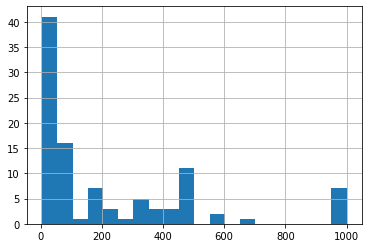

In [12]:
dataframe['Gold_weight'].hist(bins=20)

As we can see that the distribution of the data is left skewed. We need to normalize the Gold weight Data and create an new column in the dataframe for it.

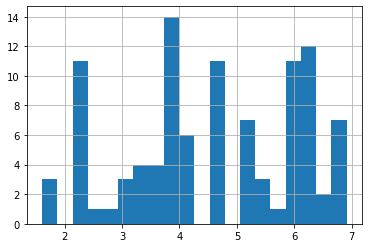

In [13]:
dataframe['Gold_weight_normalized'] = np.log(dataframe['Gold_weight'])
dataframe['Gold_weight_normalized'].hist(bins=20)

Gold Purity

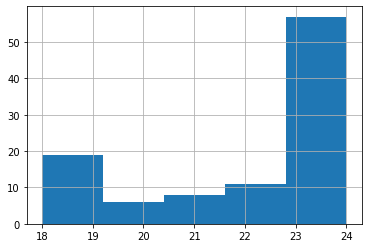

In [14]:
dataframe['Gold_purity'].hist(bins=5)

As we can see that the distribution of the data is left skewed. We need to normalize the Gold Purity Data and create an new column in the dataframe for it.

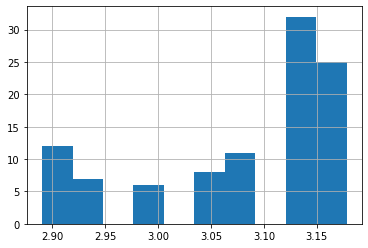

In [15]:
dataframe['Gold_purity_normalized'] = np.log(dataframe['Gold_purity'])
dataframe['Gold_purity_normalized'].hist(bins=10)

In [16]:
dataframe.head(3)

,Name,Nationality,Age,Identity_documents,Gold_type,Gold_weight,Gold_purity,Gold_documents,Eligibility,age_group,Gold_weight_normalized,Gold_purity_normalized
0,Raj Shrivastav,Indian,23,Verified,Ornaments,10.3,23,Verified,Yes,Youth,2.332144,3.135494
1,Mahindra Singh,Indian,31,Verified,Ornaments,20.0,21,Verified,Yes,Youth,2.995732,3.044522
2,Amar Singh,Indian,56,Verified,Ornaments,11.0,21,Verified,Yes,Middle_aged,2.397895,3.044522


Since now we have removed all the null values and also normalized the required data let us proceed further by dividing our dataset into Independent and Dependent Data.

**X Variable will have all the Independent Data that is, Nationality, Age_group, Identity Documents, Gold_Type, Gold_Documents,Gold_weight_normalized, Gold_weight_normalized**

**Y is the variable that will contain all the dependent data that is in our case we have only the Eligibility Criteria.**

In [17]:
X = dataframe.iloc[:, np.r_[1,3:5,7,9:12]].values
Y = dataframe.iloc[:, np.r_[8]].values

In [18]:
X[1,:]

array(['Indian', 'Verified', 'Ornaments', 'Verified', 'Youth',
       2.995732273553991, 3.044522437723423], dtype=object)

In [19]:
Y[1:5]

array([['Yes'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

Now since we have divided our dataset into independent and dependent data, now let us split our data into train and test. Using Sklearn.modelselection (train_test_split)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)

In [21]:
X_train

array([['Indian', 'Verified', 'Ornaments', 'Verified', 'Senior',
        1.6094379124341003, 3.091042453358316],
       ['Indian', 'Verified', 'Ornaments', 'Verified', 'Senior',
        3.5263605246161616, 3.044522437723423],
       ['Indian', 'Verified', 'Minted Coins', 'Verified', 'Middle_aged',
        4.605170185988092, 3.1354942159291497],
       ['Indian', 'Verified', 'Ornaments', 'Verified', 'Youth',
        1.6094379124341003, 3.091042453358316],
       ['Indian', 'Verified', 'Ornaments', 'Verified', 'Middle_aged',
        2.1972245773362196, 2.9444389791664403],
       ['Indian', 'Verified', 'Minted Coins', 'Not Verified',
        'Middle_aged', 3.912023005428146, 3.1780538303479458],
       ['Indian', 'Not Verified', 'Ornaments', 'Verified', 'Youth',
        6.907755278982137, 2.9444389791664403],
       ['Indian', 'Verified', 'Minted Coins', 'Verified', 'Middle_aged',
        6.214608098422191, 3.1780538303479458],
       ['Indian', 'Verified', 'Minted Coins', 'Not Verified'

Since we have many categorical data in our train and test set we need to convert it into numerical data for our machine to understand it for this we will use sklearns.preprocessing (LabelEncoder) class

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder_x = LabelEncoder()

In [23]:
for i in range(0,5):
  X_train[:,i] = label_encoder_x.fit_transform(X_train[:,i])

In [24]:
X_train

array([[0, 1, 1, 2, 1, 1.6094379124341003, 3.091042453358316],
       [0, 1, 1, 2, 1, 3.5263605246161616, 3.044522437723423],
       [0, 1, 0, 2, 0, 4.605170185988092, 3.1354942159291497],
       [0, 1, 1, 2, 3, 1.6094379124341003, 3.091042453358316],
       [0, 1, 1, 2, 0, 2.1972245773362196, 2.9444389791664403],
       [0, 1, 0, 1, 0, 3.912023005428146, 3.1780538303479458],
       [0, 0, 1, 2, 3, 6.907755278982137, 2.9444389791664403],
       [0, 1, 0, 2, 0, 6.214608098422191, 3.1780538303479458],
       [0, 1, 0, 1, 0, 3.912023005428146, 3.1354942159291497],
       [0, 1, 0, 2, 0, 6.214608098422191, 3.1780538303479458],
       [0, 1, 0, 2, 0, 3.8958936234982624, 3.1780538303479458],
       [0, 1, 0, 1, 0, 4.605170185988092, 3.1354942159291497],
       [0, 1, 0, 2, 2, 3.8918202981106265, 3.1354942159291497],
       [0, 0, 1, 2, 1, 2.2082744135228043, 2.9444389791664403],
       [0, 1, 1, 2, 3, 5.298317366548036, 2.8903717578961645],
       [0, 1, 1, 2, 0, 3.912023005428146, 2.9957322

Similarly we perform it for our other datasets that is X_test, Y_train, Y_test.

Y_train

In [25]:
Y_train

array([['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'

In [26]:
label_encoder_y = LabelEncoder()
Y_train = label_encoder_y.fit_transform(Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
Y_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

X_test

In [28]:
X_test[0,:]

array(['Indian', 'Verified', 'Minted Coins', 'Verified', 'Youth',
       6.907755278982137, 3.1354942159291497], dtype=object)

In [29]:
for i in range(0,5):
  X_test[:,i] = label_encoder_x.fit_transform(X_test[:,i])

In [30]:
X_test[0,:]

array([0, 1, 0, 1, 2, 6.907755278982137, 3.1354942159291497], dtype=object)

Y_test

In [31]:
Y_test

array([['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [32]:
label_encoder_y = LabelEncoder()
Y_test = label_encoder_y.fit_transform(Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
Y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

Since our data has different variables and different ranges it is important that before applying any algorithm we need to standard our data. And for that we will use Sklearn's StandardScaler

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

We are finally finished with our preprocessing and finally we can now use our split data in our algorithms

**Let us First check with Random Forest Classifier Algorithm**, using sklearn

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [37]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [38]:
Y_pred = classifier.predict(X_test)

In [39]:
Y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [40]:
Y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

Since we have performed and trained our model and also predicted the data let us now look at the accuracy of our model using Random Forest Algorithm using sklearn's Metrics

In [41]:
from sklearn import metrics
print('The Accuracy of our model using Random Forest Algorithm is : ', metrics.accuracy_score(Y_pred,Y_test))

The Accuracy of our model using Random Forest Algorithm is :  0.7619047619047619


***The End***